In [33]:
#https://analyticsindiamag.com/how-to-implement-convolutional-autoencoder-in-pytorch-with-cuda/
!pip install torch

In [26]:
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [40]:
#we will set the hyperparameters 
# Model configuration
batch_size = 250
#no_epochs = 25
no_epochs = 2
no_classes = 10
validation_split = 0.2
verbosity = 1

In [41]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) =mnist.load_data()

# Shape of the input sets
input_train_shape = input_train.shape
input_test_shape = input_test.shape 








In [42]:

# Keras layer input shape
input_shape = (input_train_shape[1], input_train_shape[2], 1)
               
# Reshape the training data to include channels
input_train = input_train.reshape(input_train_shape[0], input_train_shape[1], input_train_shape[2], 1)


input_test = input_test.reshape(input_test_shape[0], input_test_shape[1], input_test_shape[2], 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize input data
input_train = input_train / 255
input_test = input_test / 255

In [37]:
#Building a Model Without Batch Normalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metric  s
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/2
192/192 [==============================] - 36s 186ms/step - loss: 0.3023 - accuracy: 0.9139 - val_loss: 0.0841 - val_accuracy: 0.9739
Epoch 2/2
192/192 [==============================] - 36s 186ms/step - loss: 0.0690 - accuracy: 0.9788 - val_loss: 0.0579 - val_accuracy: 0.9828
Test loss: 0.04634690657258034 / Test accuracy: 0.9847999811172485


In [43]:
#Building a Model With Adding Batch Normalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(no_classes, activation='softmax'))


# Compile the model
model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])



# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metric  s
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/2
192/192 [==============================] - 53s 276ms/step - loss: 0.1209 - accuracy: 0.9634 - val_loss: 10.8532 - val_accuracy: 0.1060
Epoch 2/2
192/192 [==============================] - 53s 277ms/step - loss: 0.0310 - accuracy: 0.9911 - val_loss: 5.7405 - val_accuracy: 0.1104
Test loss: 5.73112678527832 / Test accuracy: 0.11649999767541885


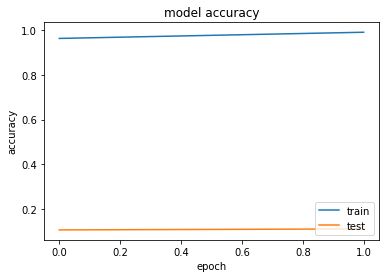

In [44]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()